In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy

%matplotlib inline

### Gather

In [2]:
# Import twitter archive (given)
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# # Programmatically downlaod and store tweet image prediction data using requests
# r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# with open('image-predictions.tsv', 'w') as fp:
#     for line in r.text.splitlines():
#         fp.write(line + '\n')

In [4]:
# Import iamge prediction data
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
# #Gather retweet count and favorite count of each tweet through API
# consumer_key = '0yIMZ7lBmfngmyPMBvAu3b8WO'
# consumer_secret = 'nVMhImoJV3hOhPfSgFCYl7AslfonPkI1teJgh2l41eDX5Rt4LE'
# access_token = '356266427-Ur8d4FJy8Mct6Lboe1Ru5IZE0imv6sCL9dhfkmHF'
# access_secret = '76dGM1qn4Xqk2BVATRkjSjkzllwcYMHz4EU0gYmGLGq3d'
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# #Write retweet count and favorite count of each tweet in 'tweet_json.txt'
# with open('tweet_json.txt', 'w') as file:
#     file.write('tweet_id,retweet_count,favourite_count\n')
#     for tweet_id in twitter_archive.tweet_id:
#         try:
#             tweet = api.get_status(id = tweet_id)
#             retweet_count = tweet.retweet_count
#             fav_count = tweet.favorite_count
#             tweet.retwe
#             text = '{},{},{}\n'.format(tweet_id,retweet_count,fav_count)
#             file.write(text)
#         except:
#             next

In [6]:
# Import retweet count and favorite count data (tweet_json.txt)
tweet_counts = pd.read_csv('tweet_json.txt')

### Assess

In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


The id columns should be converted to string. The timestamps column should be converted to timestamp.

In [9]:
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

The source column is hard to read. Need some clean up.

In [10]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Some denominators are not 10. 

In [11]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
the              8
an               7
Toby             7
Bailey           7
Daisy            7
Buddy            7
Dave             6
Scout            6
Koda             6
Stanley          6
Bella            6
Oscar            6
Jax              6
Rusty            6
Milo             6
Jack             6
Leo              6
Oakley           5
              ... 
Tuck             1
Banditt          1
Tedrick          1
Kody             1
Kirk             1
Petrick          1
Kial             1
Bobble           1
Humphrey         1
Mookie           1
Rumpole          1
Monster          1
my               1
Obi              1
Howie            1
Aubie            1
Traviss          1
Ben              1
Rolf             1
Mac              1
Mark             1
Bertson     

In [13]:
twitter_archive.name[twitter_archive.name.str[0].str.islower()].value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
getting          2
mad              2
not              2
actually         2
life             1
officially       1
my               1
infuriating      1
space            1
this             1
by               1
light            1
such             1
his              1
all              1
incredibly       1
old              1
unacceptable     1
Name: name, dtype: int64

There are missing names `None`. Also there are names that don't appear to be real names.

In [14]:
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [15]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [22]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
Samoyed                            20
malinois                           20
chow                               20
miniature_pinscher                 20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [23]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Pembroke                          27
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

Check those first predictions that are not dogs.

In [24]:
image_prediction[image_prediction.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


Even if the second or the third predictions are dogs, the probabilities are very low. These tweets aren't useful.

In [25]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id           2345 non-null int64
retweet_count      2345 non-null int64
favourite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [26]:
tweet_counts.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8627,38910
1,892177421306343426,6334,33325
2,891815181378084864,4207,25105
3,891689557279858688,8748,42270
4,891327558926688256,9507,40430


#### Quality


#### `twitter_archive` table

- `tweet_id` should be string.
- Remove the tweets with retweeted ids (Asssuming these are not original tweets)
- `Source` column is messy. Need clean up
- Somme inconsistencies in denominator rating.
- Some weird dog names such as: a, an, unacceptable. 
- The dog stage columns represent whether the dog stage word appears in the text, so they are better represented as 0 and 1, and should be categorical.
- Drop irrelevant columns(reply ids, retweet ids, expanded url)


#### `image_prediction` table

- `tweet_id` should be string.
- p1, p2, p3 - inconsistent format for the predicted breed/object (upper/lower case, replace underscoe with space)
- drop irrelevant columns(img_num, url)

#### `tweet_counts` table

- `tweet_id` should be string.

#### Tidiness

#### `twitter_archive` table

- check whether each tweet only contains one dog stage word, if so, dog stage should be one column instead of four separate columns.
- parse timesteamp into date and time columns

#### overall

- merge the three data sets into one.


### Wrangle

### `twitter_archive` table

#### Define

All id columns should be string.

#### Code

In [27]:
twitter_archive.tweet_id = twitter_archive.tweet_id.astype('str')

#### Test

In [28]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

#### Define

Remove the tweets with retweeted ids (Asssuming these are not original tweets)

#### Code

In [29]:
twitter_archive = twitter_archive[twitter_archive.retweeted_status_id.isnull()]

#### Test

In [30]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

#### Define

`Source` column is messy and hard to read.

#### Code

In [31]:
def return_source(x):
    return x[x.find('">')+2:x.find("</")]

twitter_archive.source = twitter_archive.source.apply(return_source)

#### Test

In [32]:
twitter_archive.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Define

Some inconsistencies in denominator rating. Remove those observations where the denominators are not 10.

#### Code

In [33]:
twitter_archive = twitter_archive[twitter_archive.rating_denominator == 10]

#### Test

In [34]:
twitter_archive.rating_denominator.value_counts()

10    2153
Name: rating_denominator, dtype: int64

#### Define

Replace `None` with `NaN`. Also remove names that seemingly appear to be invalid names (all 'names' starting with a lower case letter).

#### Code

In [35]:
def return_nan_name(x):
    if x.islower():
        return 'None'
    else:
        return x
    
twitter_archive.name = twitter_archive.name.apply(return_nan_name)

twitter_archive.name.replace('None', np.NaN, inplace = True)

In [36]:
twitter_archive.name.value_counts()

Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Sadie        8
Lola         8
Winston      8
Daisy        7
Toby         7
Bailey       6
Oscar        6
Koda         6
Bella        6
Bo           6
Jax          6
Stanley      6
Rusty        5
Dave         5
Milo         5
Chester      5
Buddy        5
Louis        5
Leo          5
Bentley      5
Scout        5
Duke         4
Boomer       4
Archie       4
            ..
Jo           1
Cuddles      1
Caryl        1
Brandi       1
Mairi        1
Mark         1
Meatball     1
Rolf         1
Leonidas     1
Flash        1
Terrenth     1
Eriq         1
Superpup     1
Berb         1
Anakin       1
Mack         1
Shaggy       1
Adele        1
Lulu         1
Marty        1
Mookie       1
Rumpole      1
Monster      1
Howie        1
Sam          1
Aubie        1
Traviss      1
Ben          1
Humphrey     1
Pippin       1
Name: name, Length: 928, dtype: int64

#### Define

Recode the doggo lingo values to 0 and 1

#### Code

In [37]:
def recode_lingo(x):
    if x == 'None':
        return 0
    else:
        return 1
    
twitter_archive.doggo = twitter_archive.doggo.apply(recode_lingo)
twitter_archive.floofer = twitter_archive.floofer.apply(recode_lingo)
twitter_archive.pupper = twitter_archive.pupper.apply(recode_lingo)
twitter_archive.puppo = twitter_archive.puppo.apply(recode_lingo)

#### Test

In [38]:
twitter_archive.doggo.value_counts()

0    2066
1      87
Name: doggo, dtype: int64

#### Define

Drop irrelevant columns

#### Code

In [39]:
twitter_archive.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id',
                              'retweeted_status_id', 'retweeted_status_user_id',
                              'retweeted_status_timestamp','expanded_urls'],axis = 1, inplace = True)

#### Test

In [40]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2153 non-null object
timestamp             2153 non-null object
source                2153 non-null object
text                  2153 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  1388 non-null object
doggo                 2153 non-null int64
floofer               2153 non-null int64
pupper                2153 non-null int64
puppo                 2153 non-null int64
dtypes: int64(6), object(5)
memory usage: 201.8+ KB


### `image_prediction` table

#### Define

Set `tweet_id` as string.

#### Code

In [41]:
image_prediction.tweet_id = image_prediction.tweet_id.astype('str')

#### Test

In [42]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

Fix predicted object names (p1, p2, p3)

#### Code

In [43]:
image_prediction.p1 = image_prediction.p1.str.replace('_', ' ').str.title()
image_prediction.p2 = image_prediction.p2.str.replace('_', ' ').str.title()
image_prediction.p3 = image_prediction.p3.str.replace('_', ' ').str.title()

#### Test

In [44]:
image_prediction.p1.value_counts()

Golden Retriever             150
Labrador Retriever           100
Pembroke                      89
Chihuahua                     83
Pug                           57
Chow                          44
Samoyed                       43
Toy Poodle                    39
Pomeranian                    38
Malamute                      30
Cocker Spaniel                30
French Bulldog                26
Miniature Pinscher            23
Chesapeake Bay Retriever      23
Seat Belt                     22
Siberian Husky                20
German Shepherd               20
Staffordshire Bullterrier     20
Web Site                      19
Cardigan                      19
Teddy                         18
Maltese Dog                   18
Beagle                        18
Eskimo Dog                    18
Shetland Sheepdog             18
Lakeland Terrier              17
Rottweiler                    17
Shih-Tzu                      17
Kuvasz                        16
Italian Greyhound             16
          

#### Define

- drop irrelevant columns(img_num, url)

#### Code

In [45]:
image_prediction.drop(labels=['jpg_url','img_num'], axis = 1, inplace = True)

#### Test

In [46]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 10 columns):
tweet_id    2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(4)
memory usage: 119.6+ KB


#### Define

Set `tweet_id` as string.

#### Code

In [47]:
tweet_counts.tweet_id = tweet_counts.tweet_id.astype('str')

#### Test

In [48]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id           2345 non-null object
retweet_count      2345 non-null int64
favourite_count    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


#### Define

Check whether each tweet only contains one doggo lingo, if so, doggo lingo should be one column instead of four separate columns.

#### Code

In [49]:
twitter_archive[['doggo','floofer','pupper','puppo']].sum(axis = 1).value_counts()

0    1809
1     332
2      12
dtype: int64

There are 12 tweets containing 2 doggo words. If we want to collapse the four column into one, we need to decide which word to keep.

In [50]:
twitter_archive.text[twitter_archive[['doggo','floofer','pupper','puppo']].sum(axis = 1) == 2].values

array([ "Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel",
       "At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
       'This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
       'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
       'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
       "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
       "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier

Looks like most of these 12 tweets and images contain two dogs in different dog stages. Since 12 is a relatively small number, we opt to remove these 12 observations, and then collapse the four columns into one.

In [51]:
twitter_archive = twitter_archive[twitter_archive[['doggo','floofer','pupper','puppo']].sum(axis = 1) != 2]

In [52]:
twitter_archive[['doggo','floofer','pupper','puppo']].sum(axis = 1).value_counts()

0    1809
1     332
dtype: int64

In [53]:
twitter_archive['stage'] = 'None'

twitter_archive.stage[twitter_archive.doggo == 1] = 'doggo'
twitter_archive.stage[twitter_archive.floofer == 1] = 'floofer'
twitter_archive.stage[twitter_archive.pupper == 1] = 'pupper'
twitter_archive.stage[twitter_archive.puppo == 1] = 'puppo'

twitter_archive.stage.replace('None', np.NaN, inplace = True)

C:\Users\LokHeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LokHeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\LokHeng\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\LokHeng\Ana

In [54]:
twitter_archive.drop(labels = ['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

In [55]:
twitter_archive.stage.value_counts()

pupper     224
doggo       75
puppo       24
floofer      9
Name: stage, dtype: int64

In [56]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2141 non-null object
timestamp             2141 non-null object
source                2141 non-null object
text                  2141 non-null object
rating_numerator      2141 non-null int64
rating_denominator    2141 non-null int64
name                  1384 non-null object
stage                 332 non-null object
dtypes: int64(2), object(6)
memory usage: 150.5+ KB


#### Define

parse timesteamp into date and time columns

#### Code

In [57]:
twitter_archive['date'] = pd.to_datetime(twitter_archive.timestamp.str[0:10])
twitter_archive['time'] = pd.to_datetime(twitter_archive.timestamp.str[11:-6]).dt.time

twitter_archive.drop(labels = ['timestamp'], axis = 1, inplace = True)

In [58]:
twitter_archive = twitter_archive.reindex(columns = ['tweet_id', 'date', 'time', 'source', 'text',
                                                     'rating_numerator','rating_denominator',
                                                     'name', 'stage'])

#### Check

In [59]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2141 non-null object
date                  2141 non-null datetime64[ns]
time                  2141 non-null object
source                2141 non-null object
text                  2141 non-null object
rating_numerator      2141 non-null int64
rating_denominator    2141 non-null int64
name                  1384 non-null object
stage                 332 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 167.3+ KB


#### Define

Merge the three data sets into one.

#### Code

In [60]:
twitter_archive_master = twitter_archive.merge(image_prediction, how = 'inner', on = 'tweet_id').merge(tweet_counts, how = 'inner', on = 'tweet_id')

#### Test

In [61]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1964
Data columns (total 20 columns):
tweet_id              1965 non-null object
date                  1965 non-null datetime64[ns]
time                  1965 non-null object
source                1965 non-null object
text                  1965 non-null object
rating_numerator      1965 non-null int64
rating_denominator    1965 non-null int64
name                  1343 non-null object
stage                 295 non-null object
p1                    1965 non-null object
p1_conf               1965 non-null float64
p1_dog                1965 non-null bool
p2                    1965 non-null object
p2_conf               1965 non-null float64
p2_dog                1965 non-null bool
p3                    1965 non-null object
p3_conf               1965 non-null float64
p3_dog                1965 non-null bool
retweet_count         1965 non-null int64
favourite_count       1965 non-null int64
dtypes: bool(3), datetime64[ns](1

#### Export merged data as `twitter_archive_master.csv`

In [62]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## Analysis

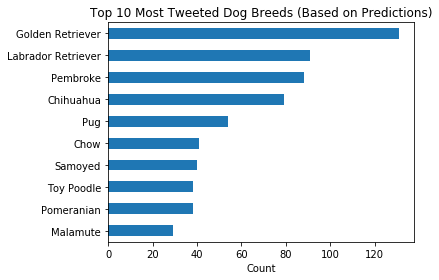

In [149]:
twitter_archive_master.p1.value_counts(ascending = True).tail(10).plot(kind = 'barh');
plt.xlabel('Count');
plt.title('Top 10 Most Tweeted Dog Breeds (Based on Predictions)')
plt.tight_layout();
plt.savefig('top10.png')

In [104]:
twitter_archive_master['year'] = twitter_archive_master.date.dt.strftime('%Y')
twitter_archive_master['month'] = twitter_archive_master.date.dt.strftime('%m')
retweet_counts = twitter_archive_master.groupby(['year','month'])['retweet_count'].agg('mean').reset_index()
retweet2015 = retweet_counts[retweet_counts.year == '2015']
retweet2016 = retweet_counts[retweet_counts.year == '2016']
retweet2017 = retweet_counts[retweet_counts.year == '2017']

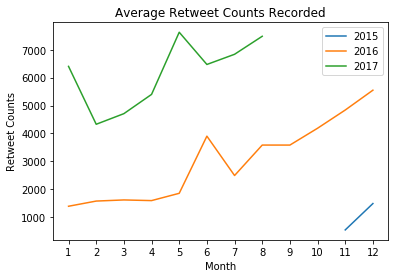

In [126]:
plot2015_ = plt.plot(retweet2015.month, retweet2015.retweet_count, label = '2015')
plot2016_ = plt.plot(retweet2016.month, retweet2016.retweet_count, label = '2016')
plot2017_ = plt.plot(retweet2017.month, retweet2017.retweet_count, label = '2017')
plt.legend();
plt.xlabel('Month');
plt.ylabel('Retweet Counts');
plt.title('Average Retweet Counts Recorded')
plt.xticks(np.arange(1,13,1));
plt.savefig('fav_counts.png')

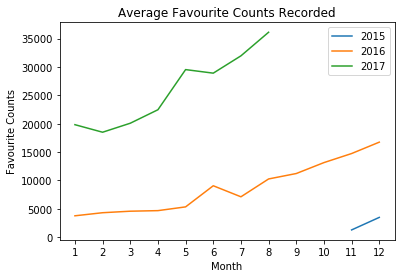

In [127]:
fav_counts = twitter_archive_master.groupby(['year','month'])['favourite_count'].agg('mean').reset_index()
fav2015 = fav_counts[fav_counts.year == '2015']
fav2016 = fav_counts[fav_counts.year == '2016']
fav2017 = fav_counts[fav_counts.year == '2017']
plot2015_ = plt.plot(fav2015.month, fav2015.favourite_count, label = '2015')
plot2016_ = plt.plot(fav2016.month, fav2016.favourite_count, label = '2016')
plot2017_ = plt.plot(fav2017.month, fav2017.favourite_count, label = '2017')
plt.legend();
plt.xlabel('Month');
plt.ylabel('Favourite Counts');
plt.title('Average Favourite Counts Recorded')
plt.xticks(np.arange(1,13,1));
plt.savefig('retweet_counts.png')

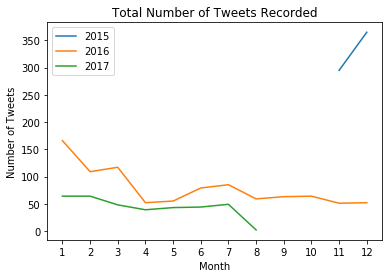

In [130]:
tweet_counts = twitter_archive_master.groupby(['year','month'])['tweet_id'].agg('count').reset_index()
tweet2015 = tweet_counts[tweet_counts.year == '2015']
tweet2016 = tweet_counts[tweet_counts.year == '2016']
tweet2017 = tweet_counts[tweet_counts.year == '2017']
plot2015_ = plt.plot(tweet2015.month, tweet2015.tweet_id, label = '2015')
plot2016_ = plt.plot(tweet2016.month, tweet2016.tweet_id, label = '2016')
plot2017_ = plt.plot(tweet2017.month, tweet2017.tweet_id, label = '2017')
plt.legend();
plt.xlabel('Month');
plt.ylabel('Number of Tweets');
plt.title('Total Number of Tweets Recorded')
plt.xticks(np.arange(1,13,1));
plt.savefig('numtweet_counts.png')

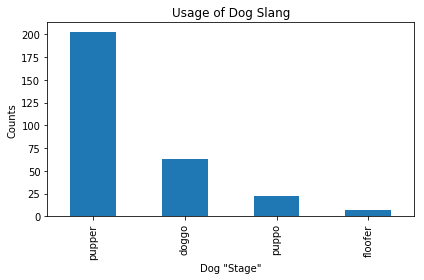

In [148]:
twitter_archive_master.stage.value_counts().plot(kind = 'bar');
plt.xlabel('Dog "Stage"');
plt.ylabel('Counts');
plt.title('Usage of Dog Slang');
plt.tight_layout();
plt.savefig('dogslang.png')